<a href="https://colab.research.google.com/github/afullhart/climateanalogs/blob/main/Figures/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%reset -f

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


All Variables:
Uncorrelated Variables:
{1: 'accm_1974_2013', 2: 'CCSM4_1974_2013_ero', 3: 'CCSM4_1974_2013_ndays', 4: 'DEM_Elev', 5: 'DEM_Slope', 6: 'POL_bd', 7: 'POL_ksat', 8: 'POL_om', 9: 'POL_ph', 10: 'POL_sand', 11: 'RAP_afgNPP', 12: 'RAP_bgr', 13: 'RAP_ltr', 14: 'RAP_pfgNPP', 15: 'RAP_shrNPP', 16: 'RAP_treNPP', 17: 'tmomn_1974_2013'}


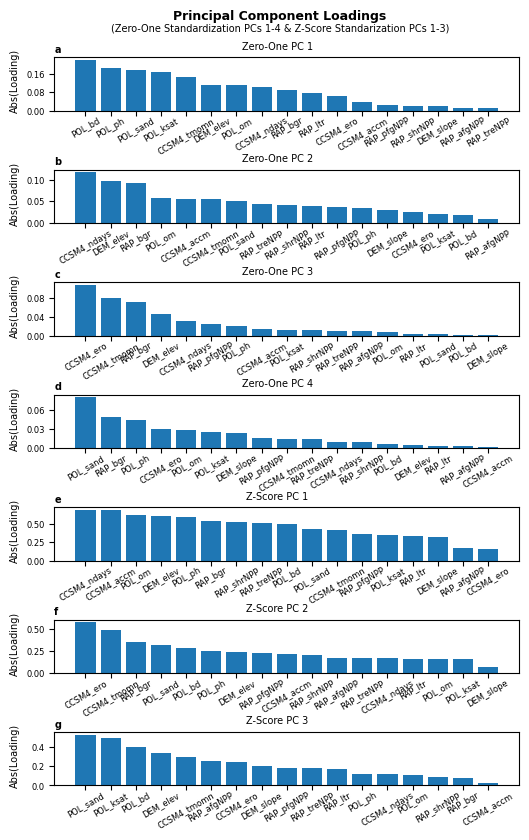

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.ticker as ticker

selection = 'ZO' #ZS OR ZO
if selection == 'ZS':
  components = 12
else:
  components = 8

zof = '/content/drive/My Drive/Colab Notebooks/Analogs/MultidimRasterLyr_d_loading_ZO.csv'
zsf = '/content/drive/My Drive/Colab Notebooks/Analogs/MultidimRasterLyr_d_loading_ZS.csv'
datafld = '/content/drive/My Drive/Colab Notebooks/Analogs/Data'

data_files = os.listdir(datafld)

input_string = ';'.join(data_files)
input_list = input_string.split(';')

removal_choices = ['tmomx_1974_2013.tif', 'pmomx_1974_2013.tif', 'pmomn_1974_2013.tif', 'CCSM4_1974_2013_swe.tif', 'CCSM4_1974_2013_consec.tif', 'CCSM4_1974_2013_pet.tif', 'POL_theta_s.tif', 'POL_theta_r.tif', 'POL_clay.tif', 'POL_silt.tif', 'RAP_afg.tif', 'RAP_pfg.tif', 'RAP_tre.tif', 'RAP_shr.tif', 'tmean_1974_2013.tif']

uncorr_input_list = []
for l in input_list:
  if l not in removal_choices:
    uncorr_input_list.append(l)

uncorr_input_string = ';'.join(uncorr_input_list)

var_labels = [s[:-4] for s in input_list]
df = pd.DataFrame(data=var_labels, index=list(range(1, len(var_labels)+1)))
print('All Variables:')
#display(df)

var_labels = [s[:-4] for s in uncorr_input_list]
df = pd.DataFrame(data=var_labels, index=list(range(1, len(var_labels)+1)))
print('Uncorrelated Variables:')
#display(df)

varidx_varlbl_key_wrong_labels = df.to_dict()[0]
print(varidx_varlbl_key_wrong_labels)



varidx_varlbl_key = {}
remove_strs = ['_1974_2013']
for key in varidx_varlbl_key_wrong_labels:
  if '_1974_2013' in varidx_varlbl_key_wrong_labels[key]:
    item = varidx_varlbl_key_wrong_labels[key]
    newitem = item.replace('_1974_2013', '')
    if 'CCSM4' not in item:
      newitem = 'CCSM4_' + newitem
  else:
    newitem = varidx_varlbl_key_wrong_labels[key]

  if 'Elev' in varidx_varlbl_key_wrong_labels[key]:
    newitem = varidx_varlbl_key_wrong_labels[key].replace('Elev', 'elev')

  if 'Slope' in varidx_varlbl_key_wrong_labels[key]:
    newitem = varidx_varlbl_key_wrong_labels[key].replace('Slope', 'slope')

  varidx_varlbl_key[key] = newitem

num_comps = 8



fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(6, 8))
plt.subplots_adjust(wspace=0.5, hspace=1.115, top=0.92, bottom=0.01)
fig.suptitle('Principal Component Loadings', fontweight='bold', fontsize=9)
axes[0].text(1.0, 0.35, '(Zero-One Standardization PCs 1-4 & Z-Score Standarization PCs 1-3)', fontsize=7)
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.major.pad'] = 0

ax_titles = ['Zero-One PC 1', 'Zero-One PC 2', 'Zero-One PC 3', 'Zero-One PC 4', 'Z-Score PC 1', 'Z-Score PC 2', 'Z-Score PC 3']
ax_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

ii = 0
jj = 0
for i, ax in enumerate(axes.flat):
  if i <= 3:
    df = pd.read_csv(zof)
    col_str = 'PC_{}'.format(ii+1)
    ii += 1
  else:
    df = pd.read_csv(zsf)
    col_str = 'PC_{}'.format(jj+1)
    jj += 1

  sorted_df = df.sort_values(by=col_str, key=abs, ascending=False)
  sorted_idx = [x+1 for x in sorted_df.index.to_list()]
  x_labels = [varidx_varlbl_key[sorted_idx[j]] for j in range(len(sorted_idx))]
  y = sorted_df[col_str].to_list()
  y_abs = [abs(n) for n in y]
  ax.tick_params(axis='x', labelrotation=30, labelsize=6)
  ax.set_title(ax_titles[i], x=0.48, fontsize=7)
  ax.bar(x_labels, y_abs)
  ax.text(-3, 0, 'Abs(Loading)', fontsize=7, rotation=90)
  ax.text(0.0, 1.1, ax_labels[i], fontsize=7, fontweight='bold', transform=ax.transAxes)
  ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3, min_n_ticks=3))


#plt.tight_layout()
fig.savefig('/content/drive/My Drive/Colab Notebooks/Analogs/Figure_PCA.png', dpi='figure')


